# 3 Days Machine Learning Workshop by Quantum.ai


## Machine Learning types

* **Regression**: works on continous data
* **Classification**: works with labeled class
* **Clustering**: works on class free data 

# Regression

## Data

A manupulated data set

* **Years of Experience**: How many years of experience? 
* **Salary**: How much paid? (Prediction label)

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Data Pre-processing

## 1.1 Import Data

In [2]:
df = pd.read_csv('salary.csv')

## 1.2 Analyse Data

In [3]:
df.shape

(30, 2)

In [4]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## 1.3 Plot data (Data Visualization)

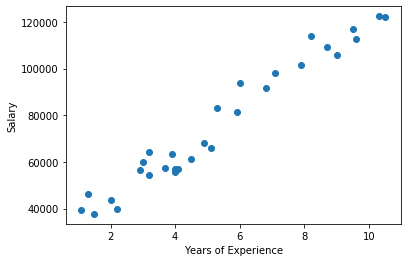

In [35]:
# Plot
X = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)
plt.scatter(X, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## 1.4 Split data into train and test sets

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [37]:
print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

(24, 1)
[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
(24, 1)
[[112635]
 [ 55794]
 [ 83088]
 [101302]
 [ 56642]
 [ 66029]
 [ 64445]
 [ 61111]
 [113812]
 [ 91738]
 [ 46205]
 [121872]
 [ 60150]
 [ 39891]
 [ 81363]
 [ 93940]
 [ 57189]
 [ 54445]
 [105582]
 [ 43525]
 [ 39343]
 [ 98273]
 [ 67938]
 [ 56957]]


In [38]:
print(X_test.shape)
print(X_test)

(6, 1)
[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


# Step 2: Build Machine Learning Model

**Linear regression** performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.

## 2.1 Learning Model (training)

In [39]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Find intercept and coefficient of Best fit line

In [40]:
# y intercept:
print(regressor.intercept_)
# m slope:
print(regressor.coef_)

[26780.09915063]
[[9312.57512673]]


## 2.2 Prediction (test)

In [41]:
y_pred = regressor.predict(X_test)

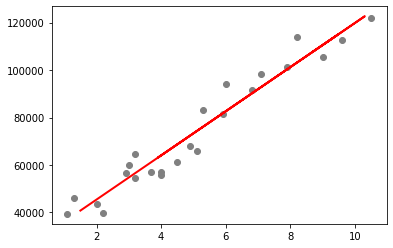

In [42]:
plt.scatter(X_train, y_train,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# Step 3: Performance Evaluation

## 3.1 Manual Analysis and ploting

In [43]:
print(y_test)
print(y_pred)

[[ 37731]
 [122391]
 [ 57081]
 [ 63218]
 [116969]
 [109431]]
[[ 40748.96184072]
 [122699.62295594]
 [ 64961.65717022]
 [ 63099.14214487]
 [115249.56285456]
 [107799.50275317]]


In [44]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(result)

   Actual      Predicted
0   37731   40748.961841
1  122391  122699.622956
2   57081   64961.657170
3   63218   63099.142145
4  116969  115249.562855
5  109431  107799.502753


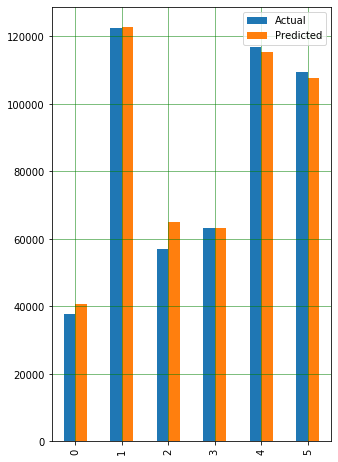

In [45]:
result.plot(kind='bar',figsize=(5,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue')
plt.show()

## 3.2 Performance Matrics

In [46]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2446.1723690465055
Mean Squared Error: 12823412.298126549
Root Mean Squared Error: 3580.979237321343


In [56]:
er = []
g = 0
for i in range(len(y_test)):
    print( "actual=", y_test[i], " observed=", np.round(y_pred[i],0))
    x = (y_test[i] - y_pred[i]) **2
    # print(y_test[i] - y_pred[i])
    er.append(x)
    g = g + x
    
x = 0
for i in range(len(er)):
   x = x + er[i]

print ("MSE", x / len(er))

actual= [37731]  observed= [40749.]
actual= [122391]  observed= [122700.]
actual= [57081]  observed= [64962.]
actual= [63218]  observed= [63099.]
actual= [116969]  observed= [115250.]
actual= [109431]  observed= [107800.]
MSE [12823412.29812655]


In [63]:
import numpy as np

def mean_absolute_percentage_error(y_test, y_pred): 
    y_true, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mean_absolute_percentage_error(y_test, y_pred)

4.2009635296206715

# Thank you.